<h1>Igualación en Palomas: conducta en equilibrio y velocidad de ajuste a cambios en el ambiente</h1>
<h3>jlbm, Nov. 19, 2021</h3>

<h2>El Fenómeno</h2>

El fenómeno conocido como **ley de igualación** puede resumirse como: _la distribución de conducta entre diferentes fuentes de recompensa es igual a la distribución de recompensas que genera cada una de esas fuentes_. En otras palabras, si tenemos dos fuentes de recompensa en donde una paga el doble que la otra, el principio de igualación sugiere que destinaremos el doble de recursos a explotar la opción más rica que los que destinaremos a explotar la que paga menos.

El experimento seminal fue reportado por Richard Herrnstein, utilizando palomas y cajas de condicionamiento. En la caja, los animales tenían dos opciones (teclas) de respuesta. Cada opción pagaba con cierta tasa, de acuerdo con un programa de Intervalo Variable. En una condición, por ejemplo, la tecla derecha pagaba 2 veces por minuto, mientras que en la misma condición la tecla izquierda pagaba 4 veces por minuto. El hallazgo central es que, en las sesiones bajo esta condición, los animales respondían aproximadamente el doble de veces en la tecla "rica" que en la tecla "pobre".

En otras condiciones del experimento la tecla previamente "rica" se convertía en "pobre", y viceversa. En general, en todas las condiciones, el porcentaje de respuestas en cada tecla fue muy cercano al porcentaje de reforzadores generados en esa alternativa:

<center><img src='matching.png' width=300 height=300 /></center>

* Herrnstein, R. J. (1961). Relative and absolute strength of response as a function of frequency of reinforcement. _Journal of the Experimental Analysis of Behavior, 4,_ 267-272.

Este hallazgo es bastante robusto y se ha replicado en innumerables ocasiones, con diferentes especies, utilizando diferentes medidas de "inversión de recursos" y diferentes tipos de recompesas.

<h2>Antecedentes</h2>

Si bien el principio de igualación describe un equilibrio a largo plazo (i.e., contando muchas respuestas y muchos reforzadores), no especifica cómo se alcanza dicho equilibrio.

Existen varios modelos dinámicos que pretenden explicar cómo se llega al equilibrio de igualación en términos de lo que ocurre respuesta a respuesta, o reforzador a reforzador. Una manera de evaluarlos es estudiar la conducta de esos modelos bajo condiciones estables, pero otra es estudiarlos bajo condiciones dinámicas en las que las opciones de respuesta cambian de papel (la rica pasa a ser pobre y al revés) súbitamente y sin señales perceptuales que indiquen el cambio.

Desde luego, en este tipo de escenarios nos interesa averiguar qué hacen los modelos y también qué hacen los organismos biológicos. Gallistel y cols., por ejemplo, reportan que las ratas detectan este tipo de cambios en el ambiente rápidamente y comienzan a ajustar su conducta al nuevo escenario casi tan pronto como un agente Bayesiano:   

* Gallistel, C. R. et al. (2001). The rat approximates and ideal detector of changes in rates of reward: implications for the Law of Effect. _Journal of Experimental Psychology, 27(4)_, 354-372.

El presente experimento tuvo como propósito principal averiguar si las palomas son igual de rápidas que las ratas para detectar estos cambios, y como objetivo(s) secundario(s) generar una base de datos abierta (https://github.com/JLBaroja/JAPE) para probar diferentes modelos dinámicos/de equilibrio.

<h2>Experimento</h2>

* 6 palomas, cajas de condicionamiento con dos teclas de respuesta.
* 180 sesiones, entre las cuales,
    * algunas son **estables**: las tasas de recompensa no cambian durante la sesión
    * otras son **inestables**: las tasas cambian sin aviso en algún momento (aleatorio) de la sesión 

Además,

* En las primeras sesiones los cambios son **raros**: hay muchas sesiones estables y pocas inestables.
* En la últimas sesiones los cambios son **frecuentes**: hay pocas sesiones estables y muchas inestables.

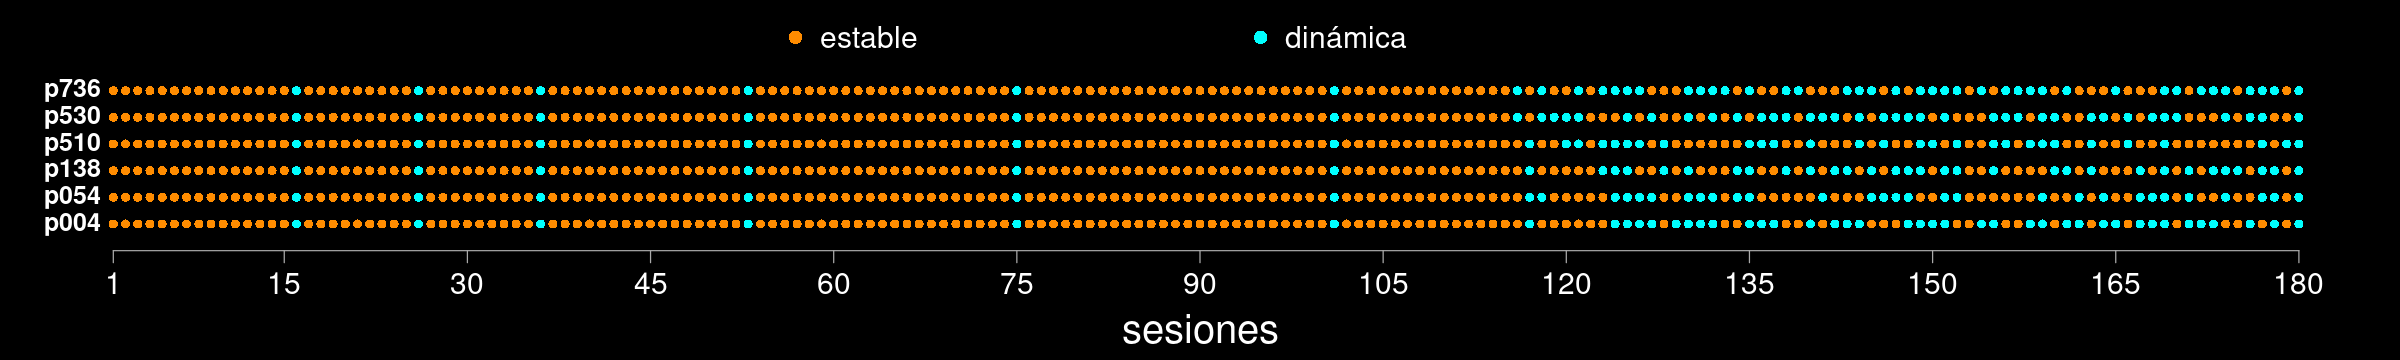

In [97]:
ss_summ <- read.csv('~/JAPE/ConcurrentData/session_summary.csv')
options(repr.plot.width=20,repr.plot.height=3)
par(mar=c(3,0,0,0),bg='#000000')
plot(NULL,xlim=c(-1,181),ylim=c(-1,9))
legend(90,8,horiz=T,xjust=0.5,yjust=0.5,
       x.intersp=0.3,
       legend=c('estable','dinámica'),
       pch=16,col=colors,cex=1.5,
      text.col='#ffffff')
axis(1,col='#aaaaaa',col.axis='#ffffff',
    at=c(1,seq(15,180,15)),pos=0,cex.axis=1.5)
mtext('sesiones',1,col='#ffffff',cex=2,line=1.5)
colors <- c('darkorange','cyan')
cntr <- 0
for(bb in unique(ss_summ$bird)){
    cntr <- cntr+1
    bb_dta <- subset(ss_summ,bird==bb)
    points(1:180,rep(cntr,180),
           col=colors[bb_dta$dynamic_env+1],
          pch=16)
    text(0,cntr,bb,col='#ffffff',adj=1,cex=1.25,font=2)
}

<h2>Resultados/Datos</h2>

<h3>Conducta en equilibrio (sesiones estables)</h3>

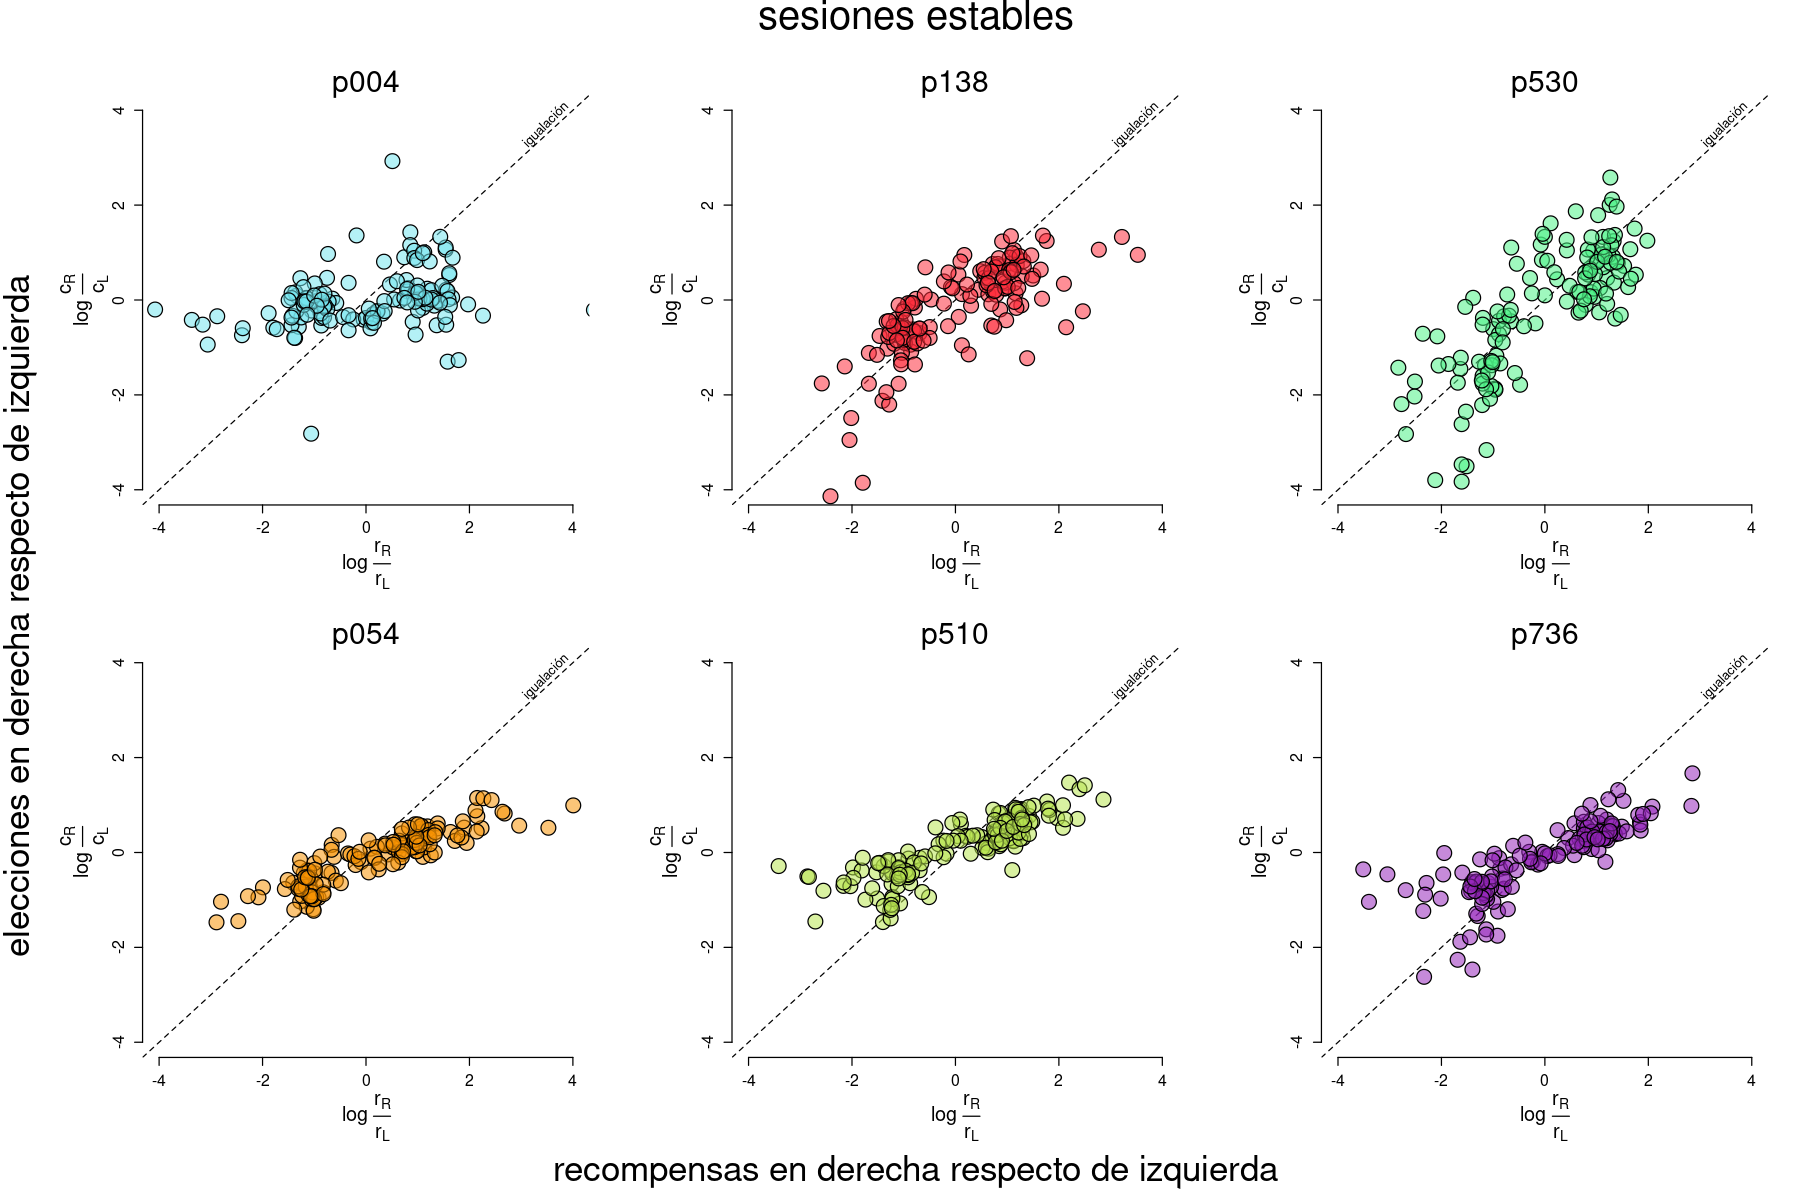

In [133]:
equilibrium <- read.csv('~/JAPE/ConcurrentData/matching_by_session.csv')
stable <- subset(equilibrium,!dynamic_env)

palette <- c("#72e5ef","#f79302","#fd2c3b",
             "#b8e450","#4cf185","#9525ba")
colors <- NULL
cntr <- 0
for(bb in unique(stable$bird)){
    cntr <- cntr+1
    colors[which(stable$bird==bb)] <- paste(palette[cntr],'88',sep='')
}
stable$colors <- colors

options(repr.plot.width=15,repr.plot.height=10)
layout(matrix(1:6,ncol=3))
par(mar=c(7,7,2,2),oma=c(2,2,4,0),cex.axis=1.2)
for(bb in unique(stable$bird)){
    bb_stable <- subset(stable,bird==bb)
plot(NULL,xlim=c(-4,4),ylim=c(-4,4),axes=F,ann=F);abline(0,1,lty='dashed')
axis(1);axis(2)
mtext(expression(paste('log ',frac('r'[R],'r'[L]))),1,line=4.5,cex=1)
mtext(expression(paste('log ',frac('c'[R],'c'[L]))),2,line=2,cex=1)
text(4,4,'igualación',srt=45,adj=c(1,-0.5))
points(log(bb_stable$n_reinf_right/bb_stable$n_reinf_left),
       log(bb_stable$n_resp_right/bb_stable$n_resp_left),
      pch=21,bg=bb_stable$colors,cex=2.5)
    mtext(bb,3,cex=1.5)
}
mtext('recompensas en derecha respecto de izquierda',1,line=0,cex=1.75,outer=T)
mtext('elecciones en derecha respecto de izquierda',2,line=0,cex=1.75,outer=T)
mtext('sesiones estables',3,line=2,cex=2,outer=T)

<h3>Conducta dinámica (sesiones inestables)</h3>

<h5>El Registro Acumualdo-Acumulado (cum-cum plots)</h5>

Uno de los recursos gráficos más útiles para presentar cualquier secuencia de eventos binarios (p.ej., ceros y unos) es el registro acumulado-acumulado. En un eje se grafica cuántos unos se han acumulado hasta la posición $i$ del arreglo, y en el otro la cantidad de ceros acumulada hasta esta posición:

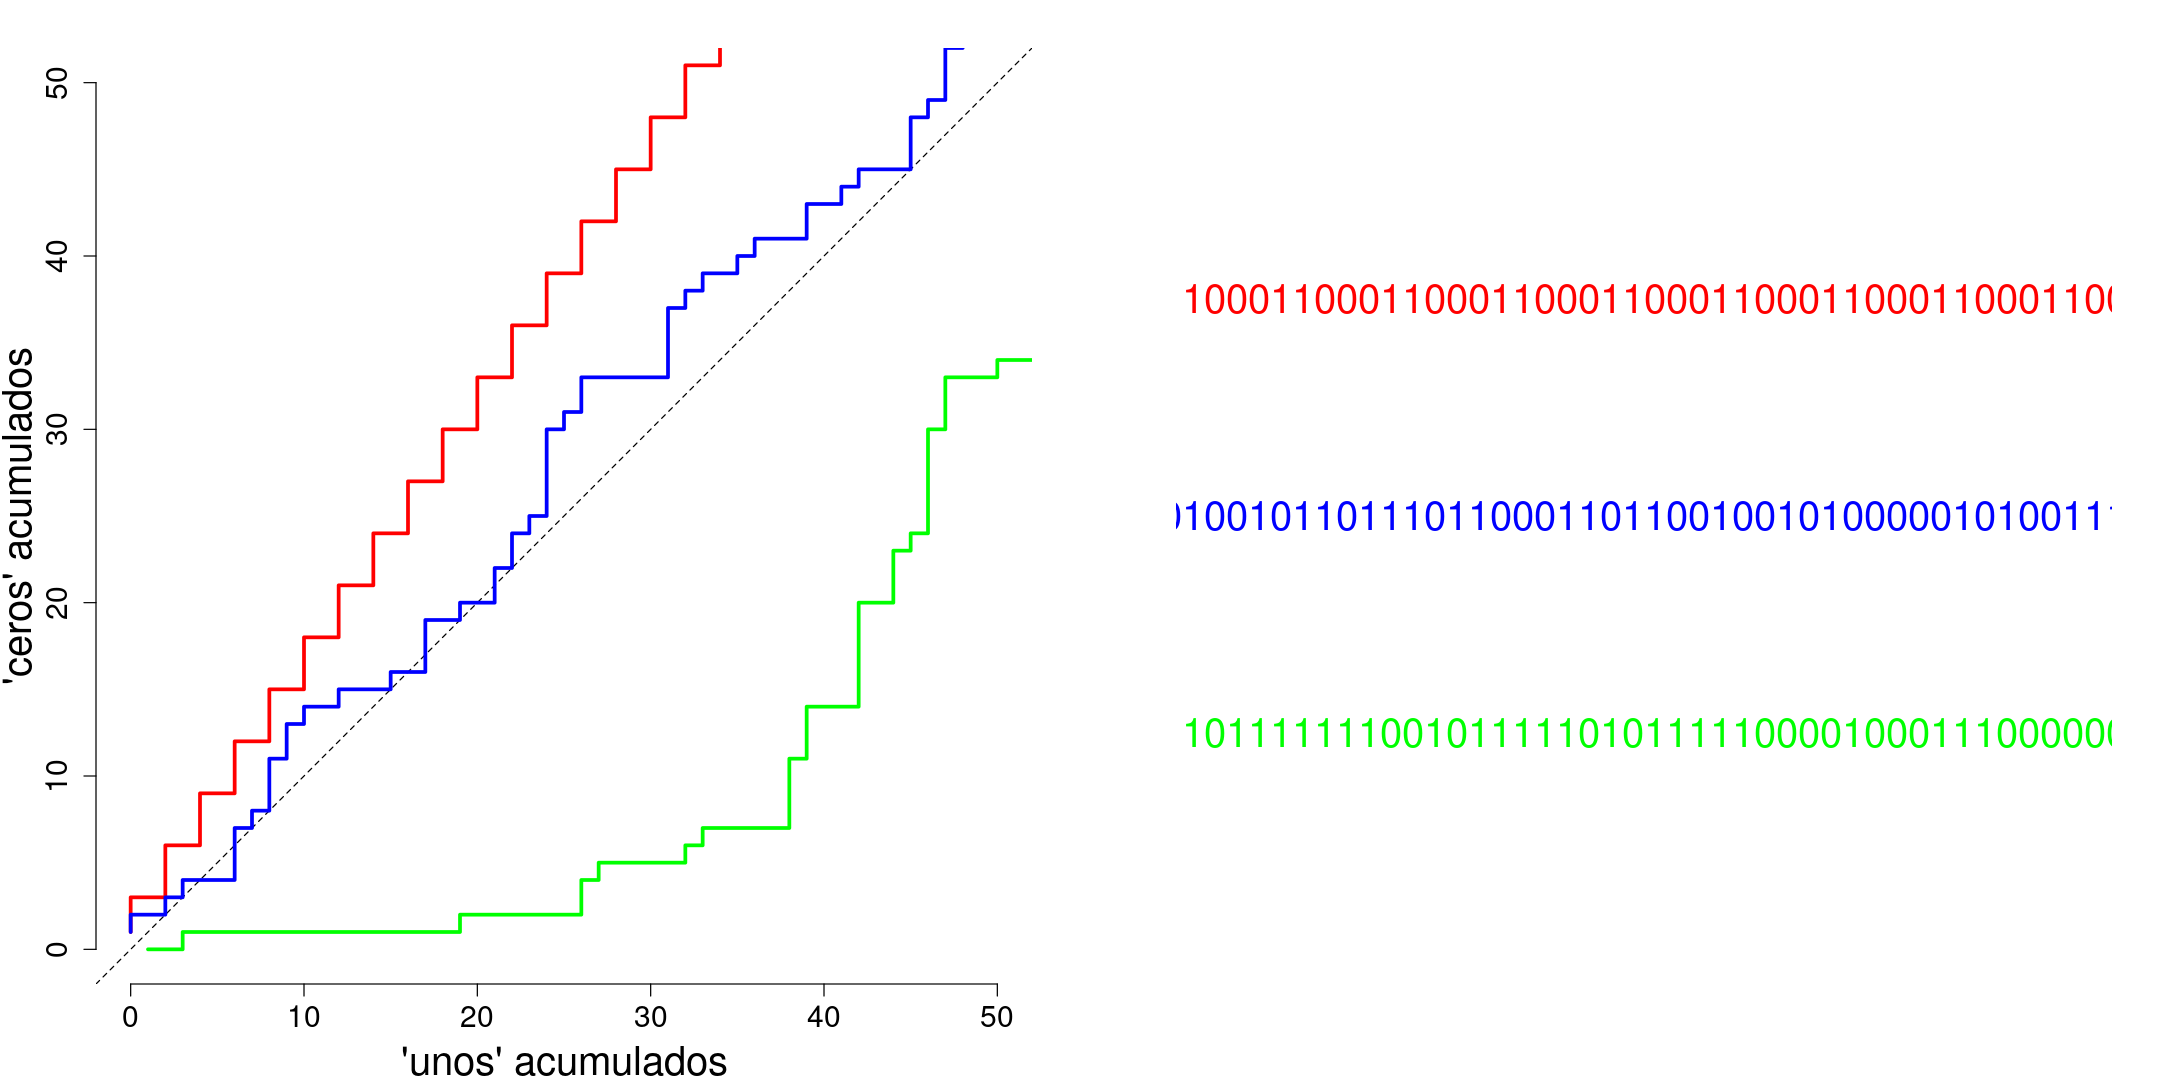

In [37]:
options(repr.plot.width=18,repr.plot.height=9)
set.seed(8)
seq1 <- rep(c(0,0,0,1,1),80)
seq2 <- rbinom(80,size=1,prob=0.5)
seq3 <- c(rbinom(45,size=1,prob=0.8),rbinom(35,size=1,prob=0.2))
sequences <- rbind(seq1,seq2,seq3)
colors <- c('red','blue','green')
layout(matrix(1:2,ncol=2))
par(cex.axis=1.5,mar=c(4,4,2,2))
# Cumulative record
plot(NULL,xlim=c(0,50),ylim=c(0,50),axes=F,ann=F);abline(0,1,lty='dashed')
axis(1);axis(2)
mtext('\'unos\' acumulados',1,cex=2,line=3)
mtext('\'ceros\' acumulados',2,cex=2,line=2.5)
for(r in 1:nrow(sequences)){
    row <- sequences[r,]
    lines(cumsum(row==1),cumsum(row==0),col=colors[r],lwd=3)
}
# Labels
plot(NULL,xlim=c(-1,1),ylim=c(-1,1),axes=F,ann=F)
y_coords <- c(0.5,0,-0.5)
for(r in 1:nrow(sequences)){
    label <- paste(sequences[r,],collapse='')
    text(0,y_coords[r],label,
        col=colors[r],cex=2)
}

In [111]:
cum_record <- function(bin_seq,
                       add=F,
                       min_lim=NULL,
                       max_lim=NULL,
                       plot=T,
                       ...){
    # bin_seq is a sequence of 0s and 1s
    cum_0 <- cumsum(bin_seq==0)
    cum_1 <- cumsum(bin_seq==1)
    if(plot){
    if(!add){
        if(is.null(max_lim)){max_lim <- max(max(cum_0),max(cum_1))}
        if(is.null(min_lim)){min_lim <- 0}
        par(mar=rep(4,4))
        plot(NULL,xlim=c(min_lim,max_lim),ylim=c(min_lim,max_lim),
            axes=F,ann=F)
        axis(1)
        axis(2)
        abline(0,1,lty='dotted')
    }
    lines(cum_1,cum_0,...)
    }
    return(list(cum_0=cum_0,cum_1=cum_1))
}

point_slope <- function(point,slope,...){
    intercept <- -slope*point[1]+point[2]
    abline(intercept,slope,...)
}

detailed_cum_rec <- function(bb,ss,post_pred=NULL,plot_data=T){
        # Session summary/info
        session_summary <- read.csv('~/JAPE/ConcurrentData/session_summary.csv')
        ss_info <- subset(session_summary,bird==bb&session==ss)        
        slope1 <- ss_info$VIright1/ss_info$VIleft1
        slope2 <- ss_info$VIright2/ss_info$VIleft2
        col <- c('#0000eeaa','#ee0000aa')[(1+as.numeric(ss_info$dynamic_env))]
        # Full bird responses
        dts_bird <- read.csv(paste('~/JAPE/ConcurrentData/ResponseAnalysis/responses_',bb,'.csv',sep=''))
        # Session Data
        dts_session <- subset(dts_bird,session==ss)
        choices <- as.numeric(dts_session$lever=='right')
        rewards <- as.numeric(dts_session$reinforced)
        # Plotting
        min_l <- -max(cumsum(choices)*.1)
        add <- F
        if(!is.null(post_pred)){
            for(i in (1:dim(post_pred)[1])[1:100]){
                cum_record(post_pred[i,],add=(i!=1),
                           col='#c7b3c288',
                           min_lim=min_l)->cr
            }
            add <- T
        }
        cum_record(choices,lwd=3,min_lim = min_l,add=add,plot=plot_data)->x
        cp_time <- ss_info$CPright
        cp_pos <- which(dts_session$time>cp_time)[1]
        cp_point <- c(x$cum_1[cp_pos],x$cum_0[cp_pos])
        clip(min_l,cp_point[1],min_l,cp_point[2])
        point_slope(cp_point,slope1,col=col,lwd=2)
        clip(cp_point[1],max(max(x$cum_1),max(x$cum_0)),cp_point[2],max(max(x$cum_1),max(x$cum_0)))
        point_slope(cp_point,slope2,col=col,lwd=2)
        clip(0,max(x$cum_1),0,max(x$cum_0))
        points(x$cum_1[cp_pos],x$cum_0[cp_pos],cex=2,pch=21,bg='#ffffff44',col=col,lwd=2)
        mtext(paste(bb,', ',ss,sep=''),cex=1.5)
        mtext('respuestas en derecha',1,line=2.5,cex=1.5)
        mtext('respuestas en izquierda',2,line=2.5,cex=1.5)
}

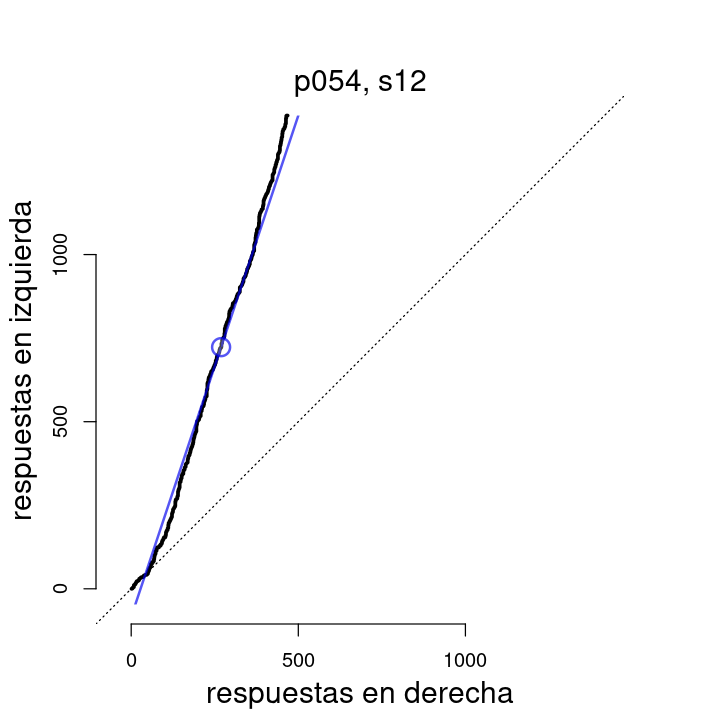

In [217]:
options(repr.plot.width=6,repr.plot.height=6)
detailed_cum_rec('p054','s12')

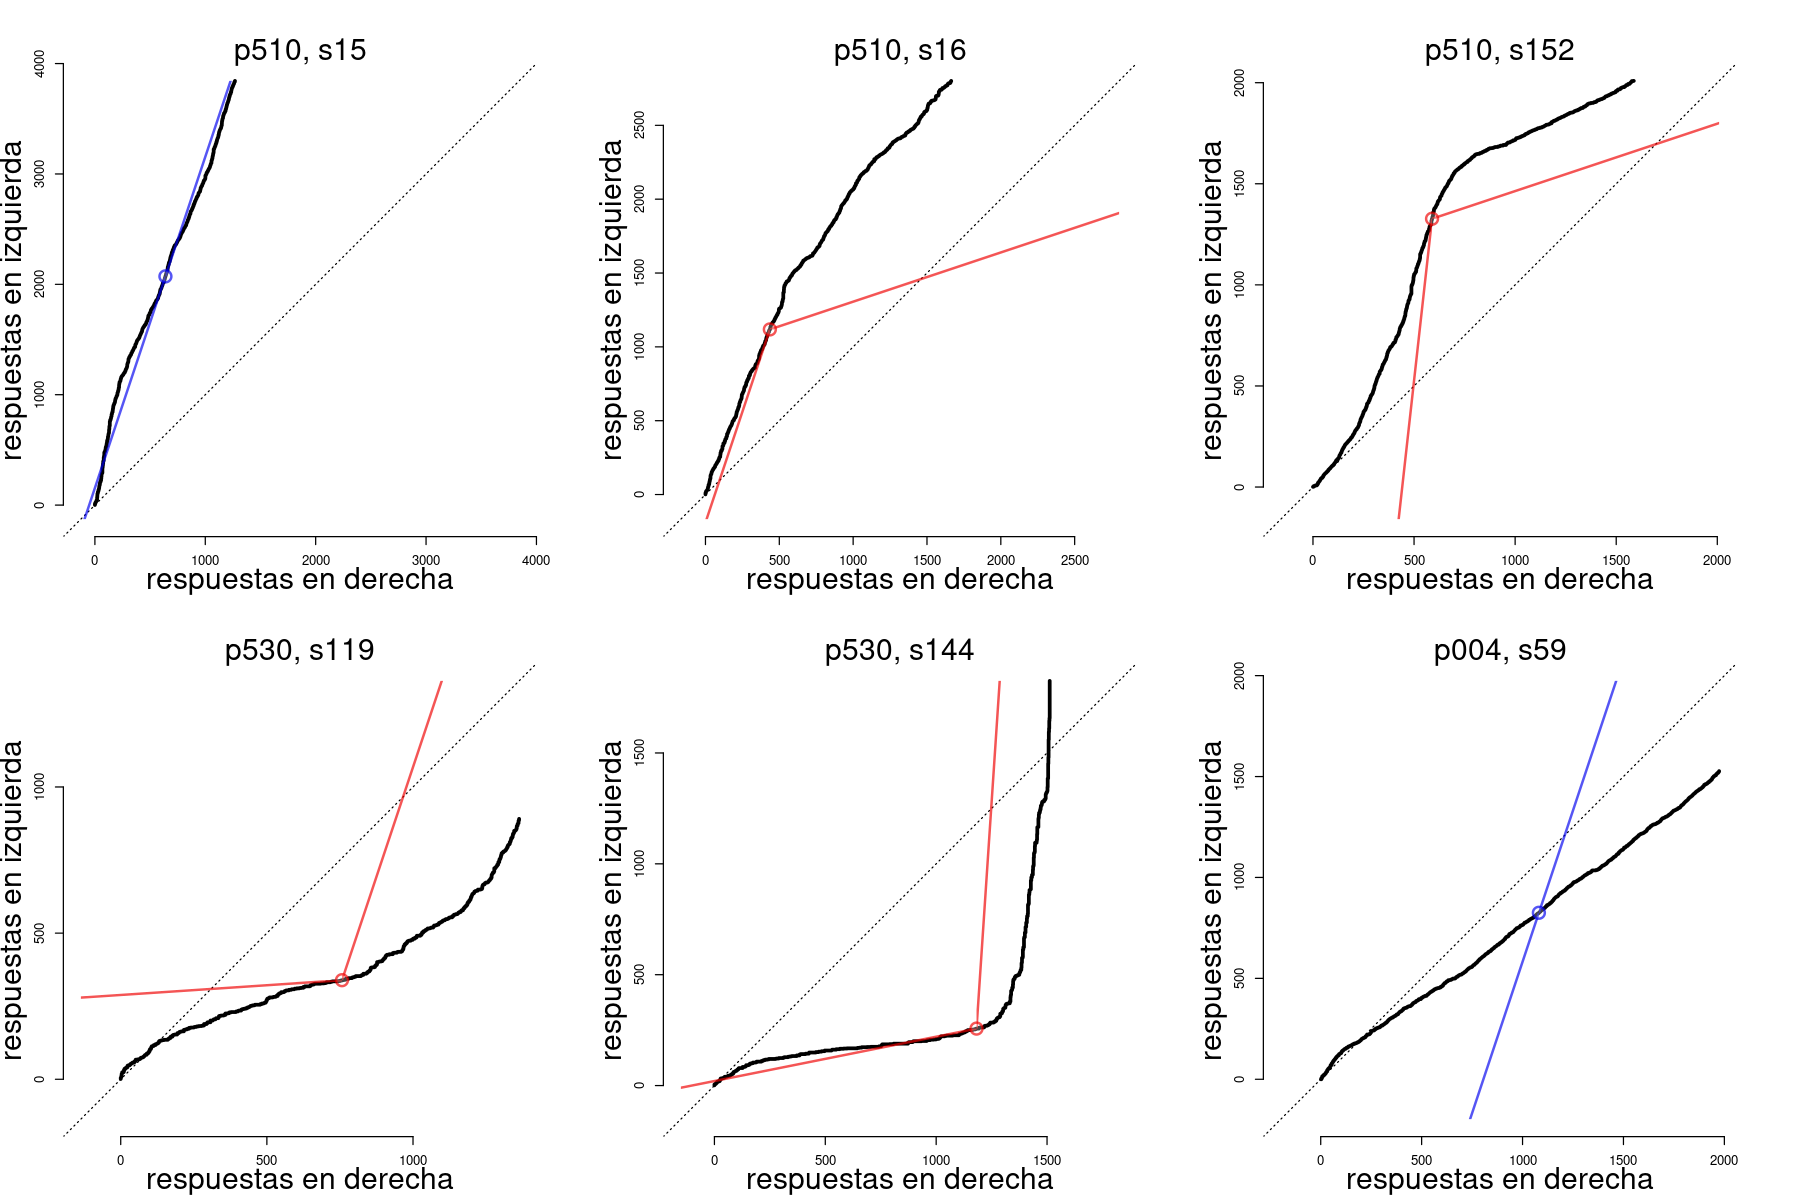

In [134]:
options(repr.plot.width=15,repr.plot.height=10)
layout(matrix(1:6,ncol=3,byrow=T))
detailed_cum_rec('p510','s15')
detailed_cum_rec('p510','s16')
detailed_cum_rec('p510','s152')
detailed_cum_rec('p530','s119')
detailed_cum_rec('p530','s144')
detailed_cum_rec('p004','s59')

<h2>Modelamiento</h2>

Como primera aproximación para explicar qué ocurre respuesta a respuesta decidí utilizar uno de los modelos más sencillos que he encontrado, propuesto por:

* Lau, B. and Glimcher, P. W. (2005). Dynamic response-by-response models of matching behavior in rhesus monkeys. _Journal of the Experimental Analysis of Behavior, 84_, 555-579.

La idea del modelo es que la siguiente decisión (derecha o izquierda) puede depender de tres cosas: cuánto ha pagado cada alternativa, cuántas veces se ha elegido cada alternativa, y de un sesgo hacia alguna de las opciones que no tiene relación con los dos factores antes mencionados.

La probabilidad de elegir, por ejemplo, la alternativa **derecha**, $p_{R,i}$, se modela como una regresión logística múltiple en donde los parámetros $\alpha$, $\beta$ y $\gamma$ representan el peso de los factores antes mecionados:

$$log\left(\frac{p_{R,i}}{p_{L,i}}\right)=\sum_{j=1}\alpha_j(r_{R,i-j}-r_{L,i-j})+\sum_{j=1}\beta_j(c_{R,i-j}-c_{L,i-j})+\gamma,$$

en donde $p_{L,i}=1-p_{R,i}$.

Las cantidades $\sum_jr_{R,i-j}$ y $\sum_jr_{L,i-j}$ cuantifican la cantidad total de recompensas obtenidas en la alternativa derecha y en la izquierda, respectivamente, desde el inicio de la sesión y hasta la respuesta anterior. Por su parte, $\sum_jc_{R,i-j}$ y $\sum_jc_{L,i-j}$ son la cantidad total de respuestas (_**c**hoices_) ejecutadas en derecha e izquierda, nuevamente desde el inicio de la sesión hasta el ensayo anterior. 

En la versión original del modelo los pesos $\alpha_j$ y $\beta_j$ se especifican a nivel de ensayo. Sin embargo, buscando comenzar con un modelo todavía más sencillo, los dejé a nivel de sesión:

\begin{align}
\alpha&\sim Normal(0,1)\\
\beta&\sim Normal(0,1)\\
\gamma&\sim Normal(0,1)\\
\theta_i&\gets\frac{1}{1+e^{\alpha\sum_j(r_{R,i-j}-r_{L,i-j})+\beta\sum_j(c_{R,i-j}-c_{L,i-j})+\gamma}}\\
c_i&\sim Bernoulli(\theta_i),
\end{align}

en donde la variable observada $c_i$ es la elección en cada respuesta de la paloma, indicando **derecha** cuando $c_i=1$ e izquierda cuando $c_i=0$.

Implementamos el modelo en `JAGS` sobre algunas sesiones "icónicas". Los resultados principales se presentan a continuación (aunque la convergencia de algunos nodos todavía puede mejorar bastante):

In [112]:
plot_model <- function(bb,ss,
                       m_list,
                      a_lims=c(-.1,.1),
                      b_lims=c(-.05,.05),
                      g_lims=c(-1,1),
                      ...){
    layout(cbind(matrix(1,nrow=2,ncol=2),
             matrix(2:5,ncol=2)))
    
    # Cum record (with posterior predictive) 
    detailed_cum_rec(bb,ss,post_pred = m_list$nds$choices_post,...)
    # Alpha
    hist(m_list$nds$alpha_post,breaks=20,xlim=a_lims,main=NULL,ann=F,axes=F,
        border=NA,col='#841ea4')
    abline(v=0,lty='dashed')
    axis(1)
    mtext('\u03b1',3,cex=2,line=2)
    # Beta
    hist(m_list$nds$beta_post,breaks=20,xlim=b_lims,main=NULL,ann=F,axes=F,
        border=NA,col='#841ea4')
    abline(v=0,lty='dashed')
    axis(1)
    mtext('\u03b2',3,cex=2,line=2)
    # Gamma
    hist(m_list$nds$gamma_post,breaks=20,xlim=g_lims,main=NULL,ann=F,axes=F,
        border=NA,col='#841ea4')
    abline(v=0,lty='dashed')
    axis(1)
    mtext('\u03b3',3,cex=2,line=2)
    # Joint
#    plot(m_list$nds$alpha_post,m_list$nds$beta_post)
}

In [203]:
load(file='~/JAPE/Modeling/m1_p004_s59_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p054_s12_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p510_s15_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p510_s16_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p510_s152_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p530_s119_LauGlimcher.RData')
load(file='~/JAPE/Modeling/m1_p530_s144_LauGlimcher.RData')

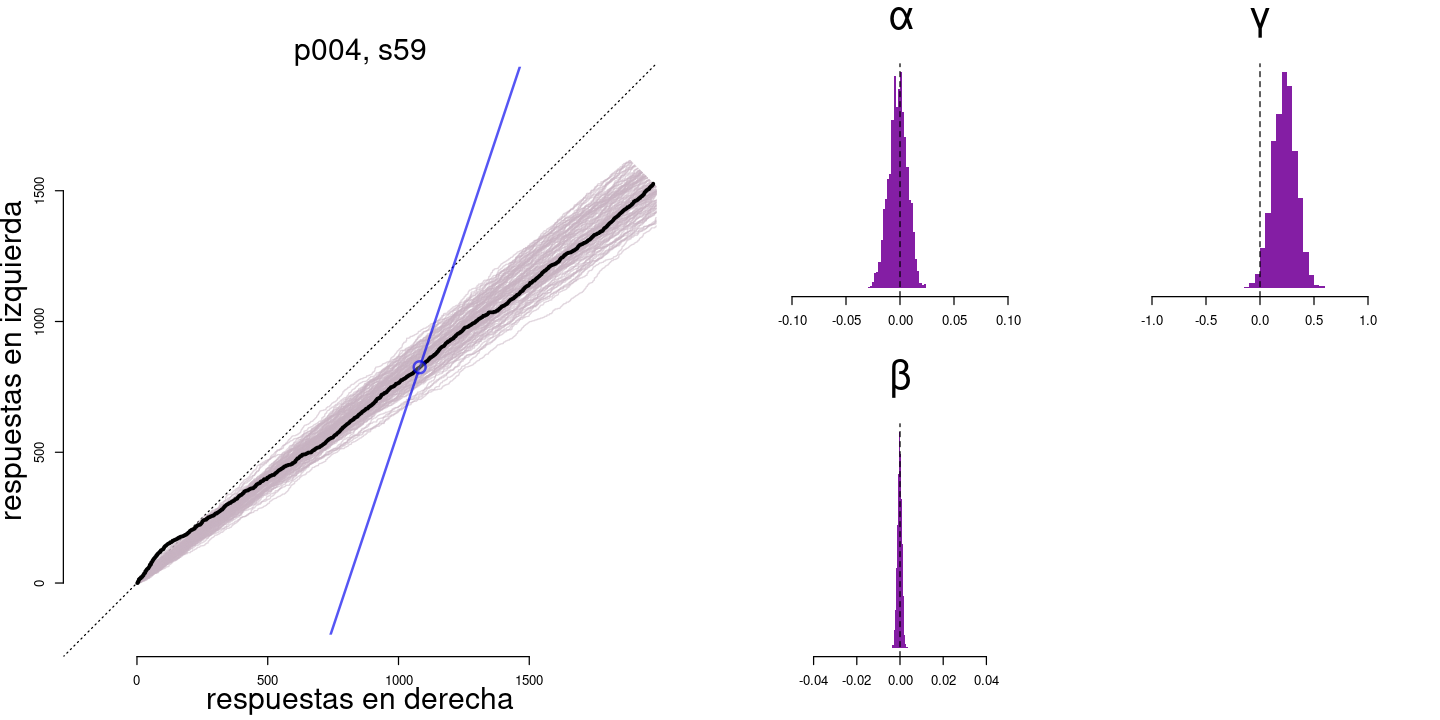

In [304]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p004','s59',m_list = m1_p004_s59)

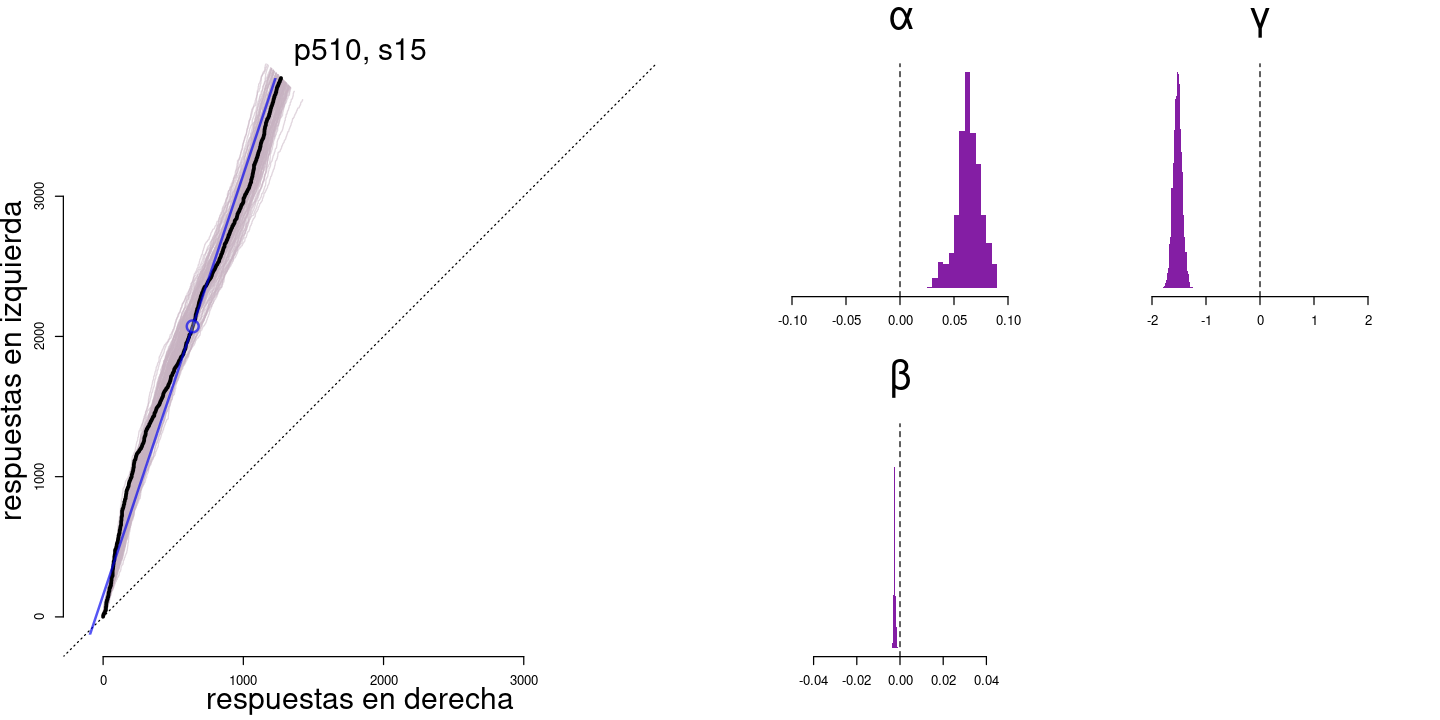

In [305]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p510','s15',m_list = m1_p510_s15,g_lims=c(-2,2))

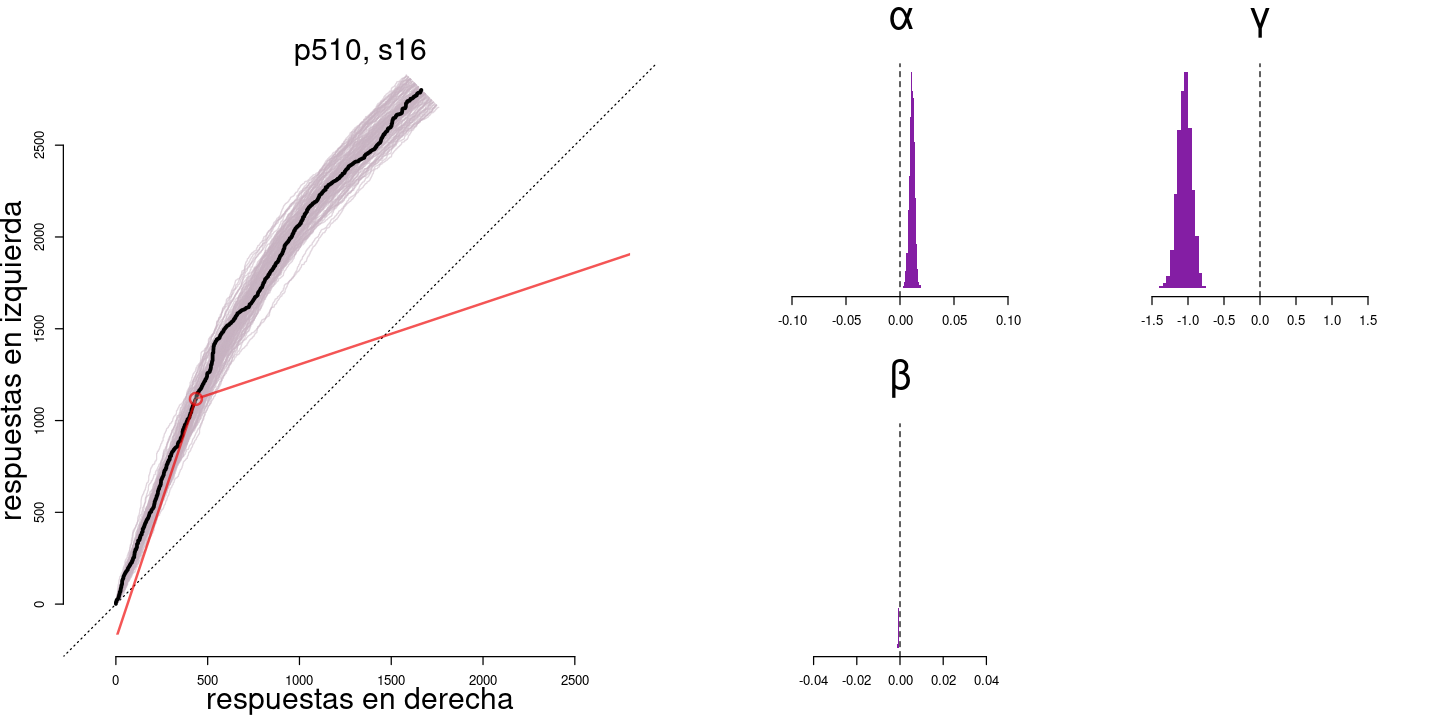

In [306]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p510','s16',m_list = m1_p510_s16,g_lims=c(-1.5,1.5))

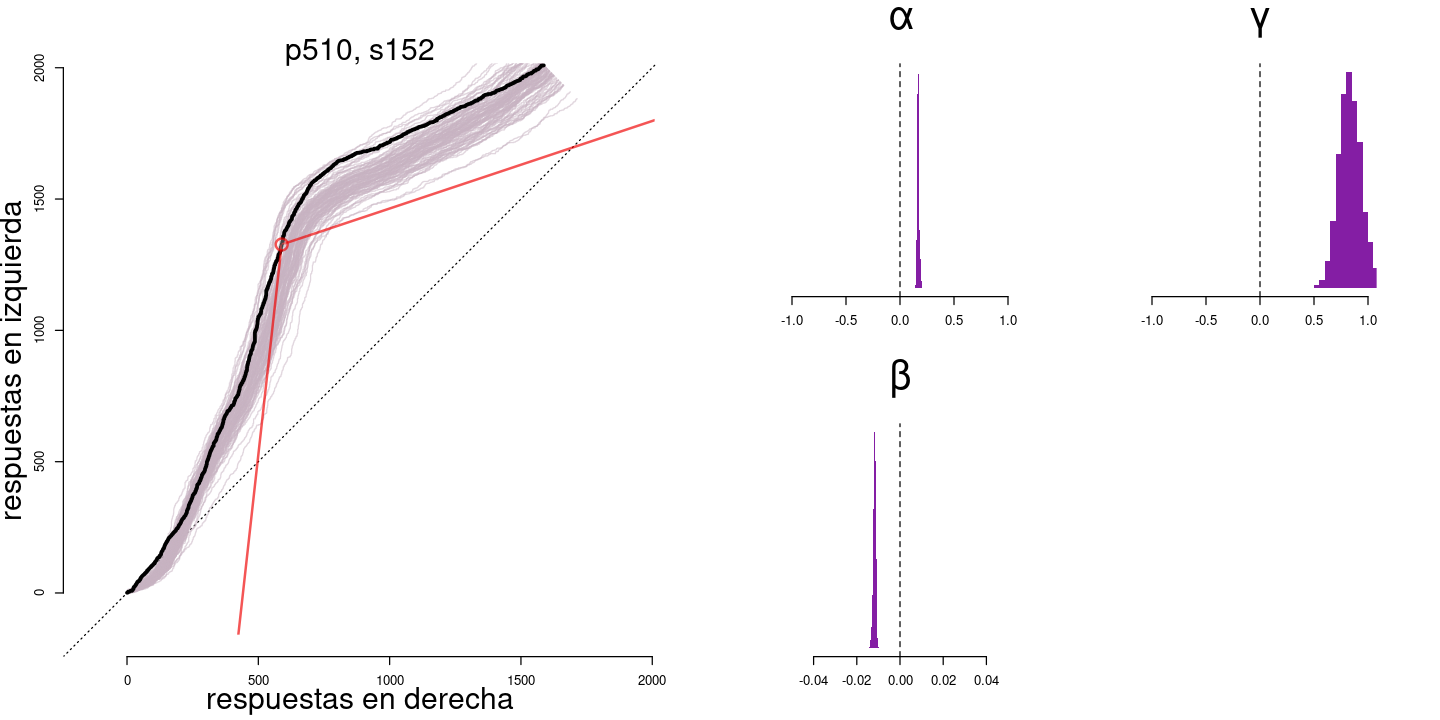

In [307]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p510','s152',m_list = m1_p510_s152,a_lims=c(-1,1))

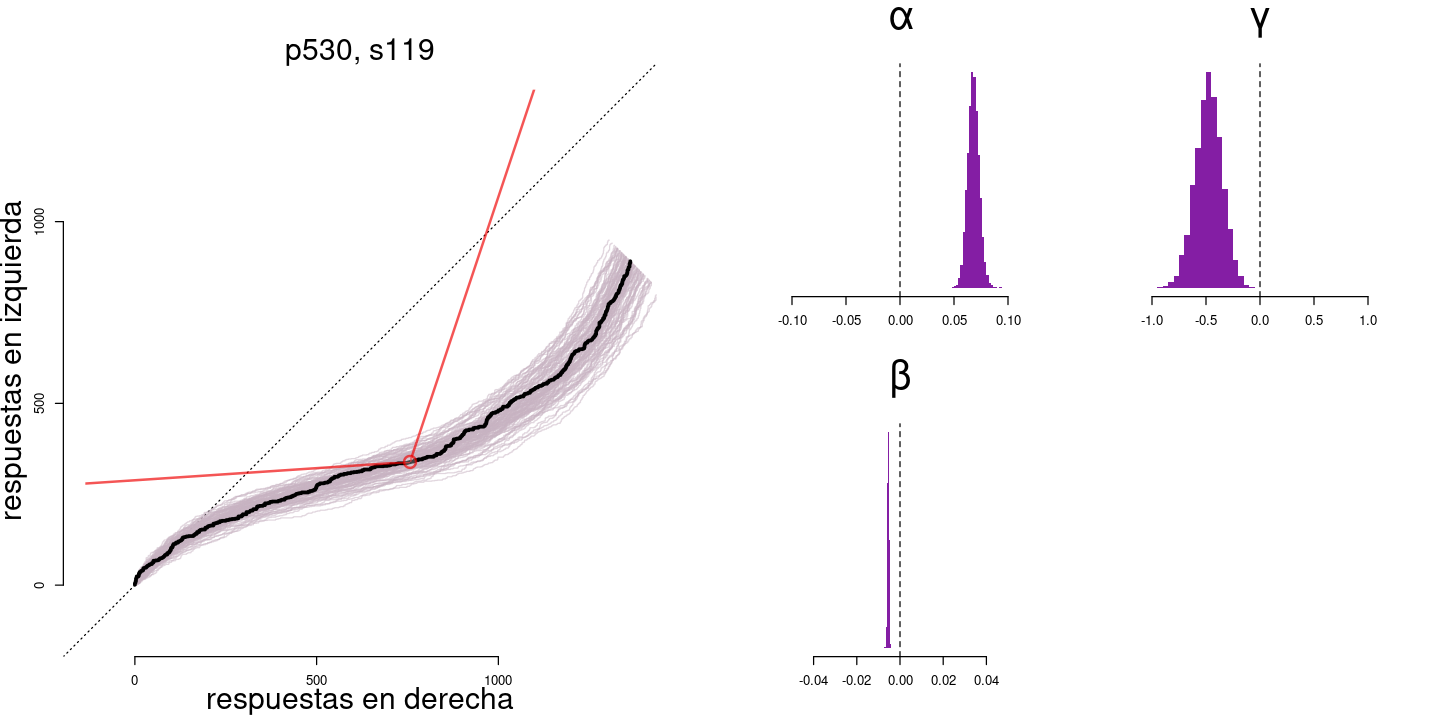

In [308]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p530','s119',m_list = m1_p530_s119)

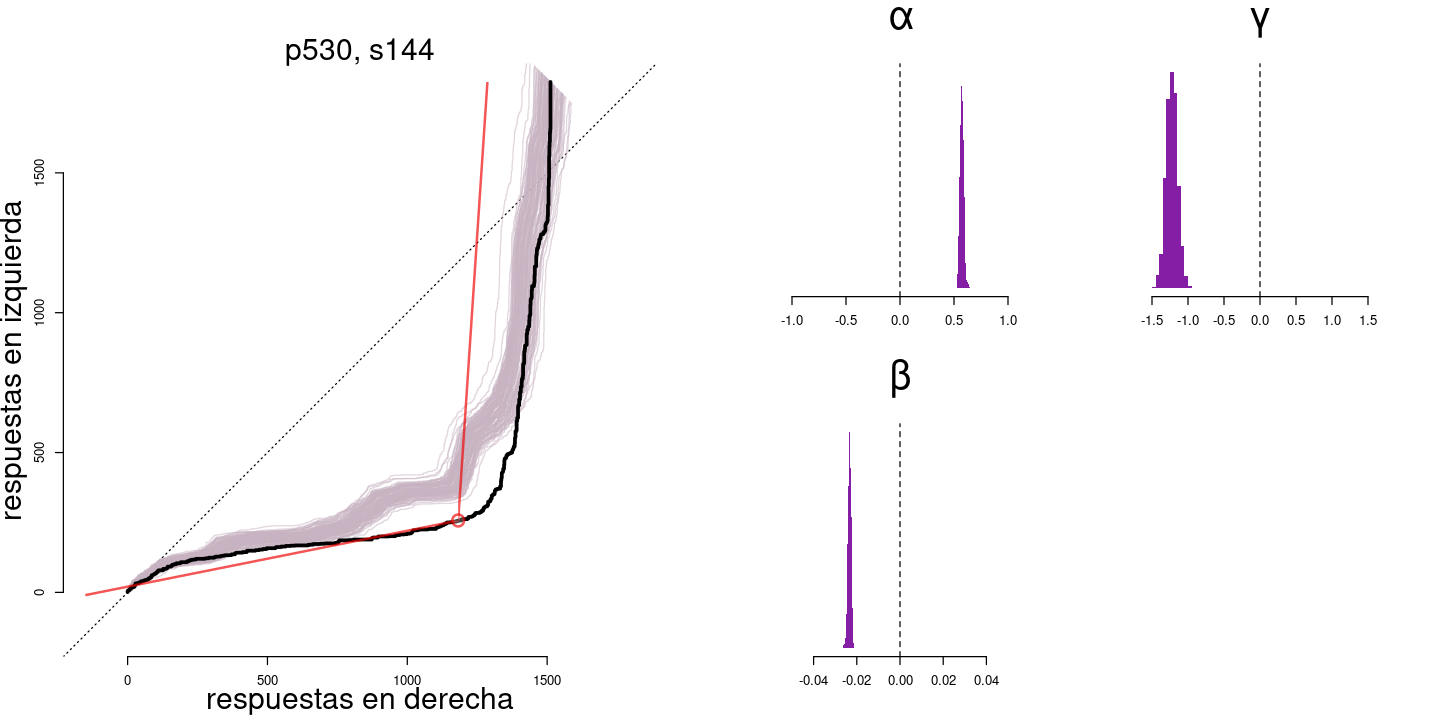

In [309]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p530','s144',m_list = m1_p530_s144,a_lims = c(-1,1),g_lims=c(-1.5,1.5))

Existen varias razones que pueden resultar en el pobre desempeño del modelo (y en las conclusiones contraintuitivas que sugiere). Quizá la principal sea que esta primera versión toma en cuenta todo lo que ha ocurrido en la sesión desde la primera respuesta.

Una posible alternativa es obligar al modelo a considerar únicamente lo que ha ocurrido en los últimos 50 ensayos, por ejemplo:

\begin{align}
\alpha&\sim Normal(0,1)\\
\beta&\sim Normal(0,1)\\
\gamma&\sim Normal(0,1)\\
\theta_i&\gets\frac{1}{1+e^{\alpha\sum_j(r_{R,i-50}-r_{L,i-50})+\beta\sum_j(c_{R,i-50}-c_{L,i-50})+\gamma}}\\
c_i&\sim Bernoulli(\theta_i),
\end{align}


In [107]:
load('~/JAPE/Modeling/m3_p510_s152_LauGlimcher.RData')
load('~/JAPE/Modeling/m3_p530_s119_LauGlimcher.RData')
load('~/JAPE/Modeling/m3_p530_s144_LauGlimcher.RData')

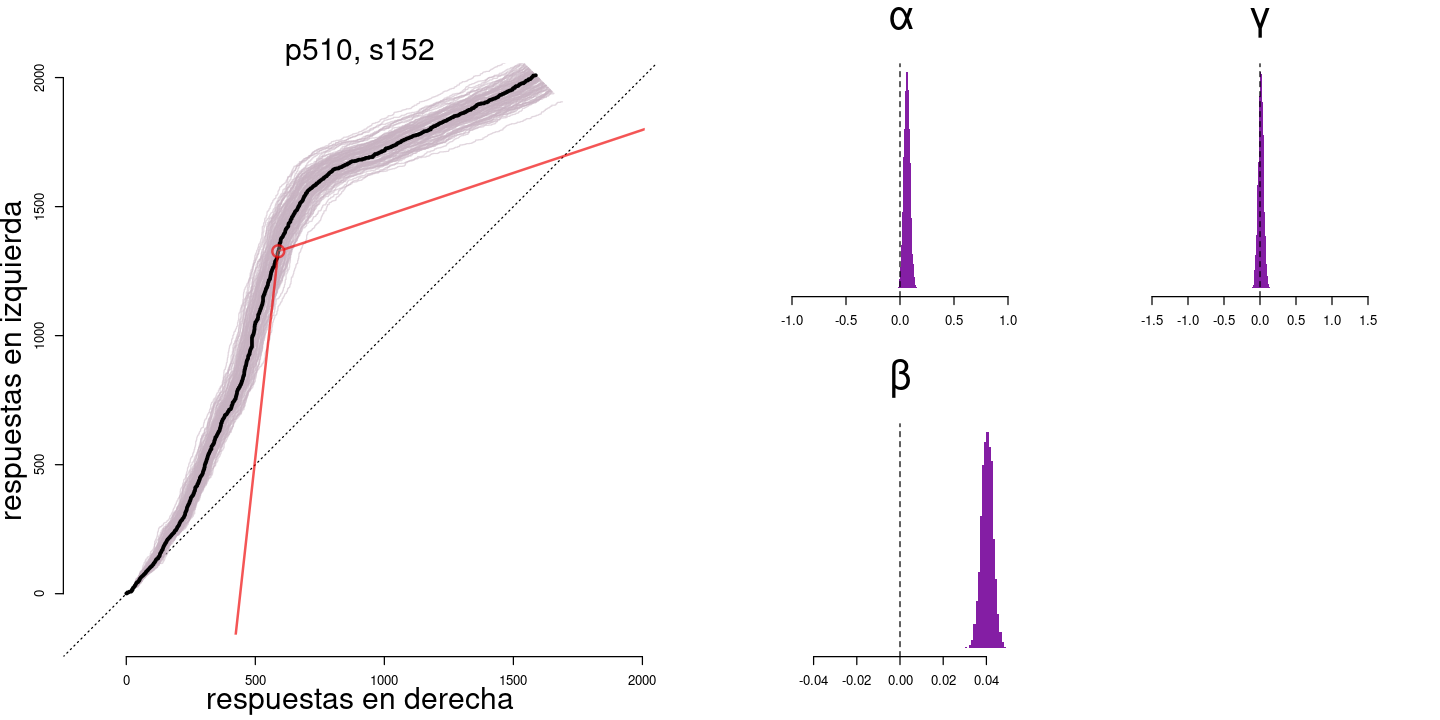

In [114]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p510','s152',m_list = m3_p510_s152,a_lims = c(-1,1),g_lims=c(-1.5,1.5),plot_data=T)

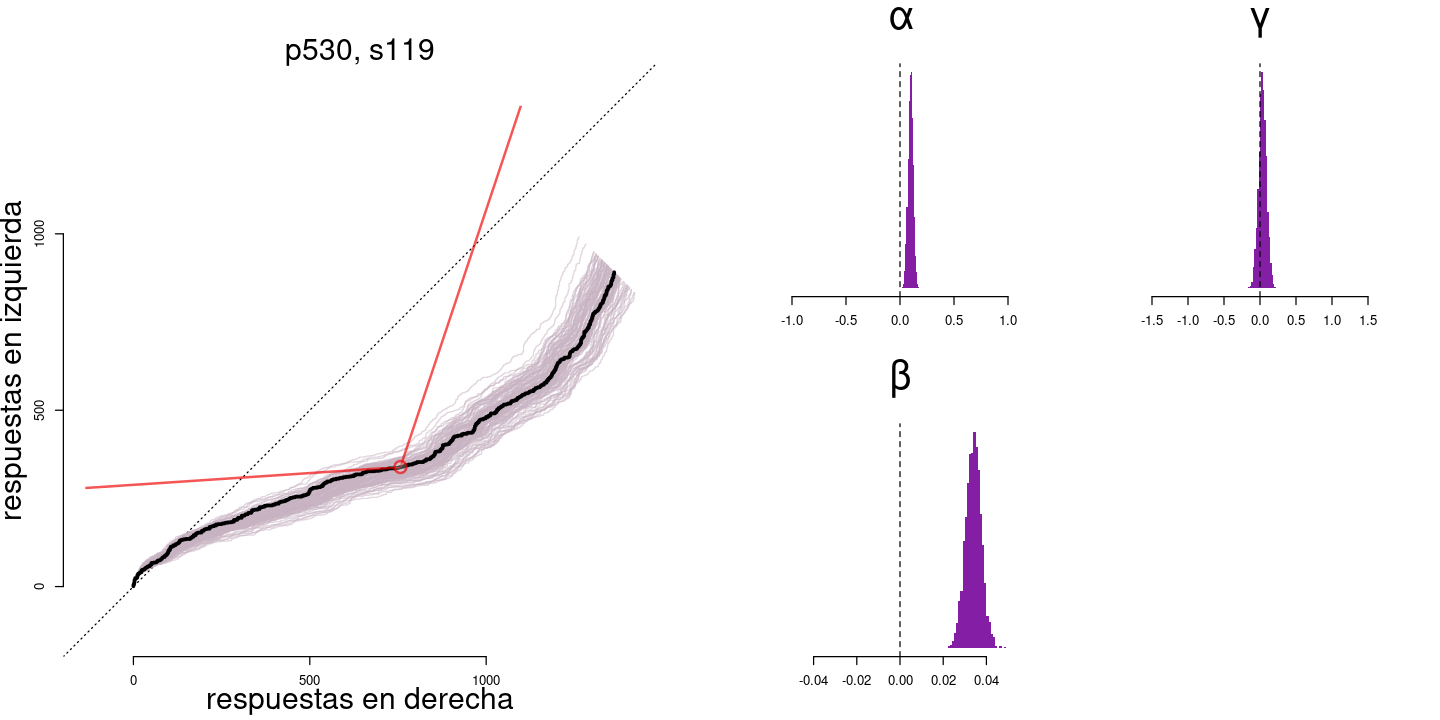

In [116]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p530','s119',m_list = m3_p530_s119,a_lims = c(-1,1),g_lims=c(-1.5,1.5),plot_data=T)

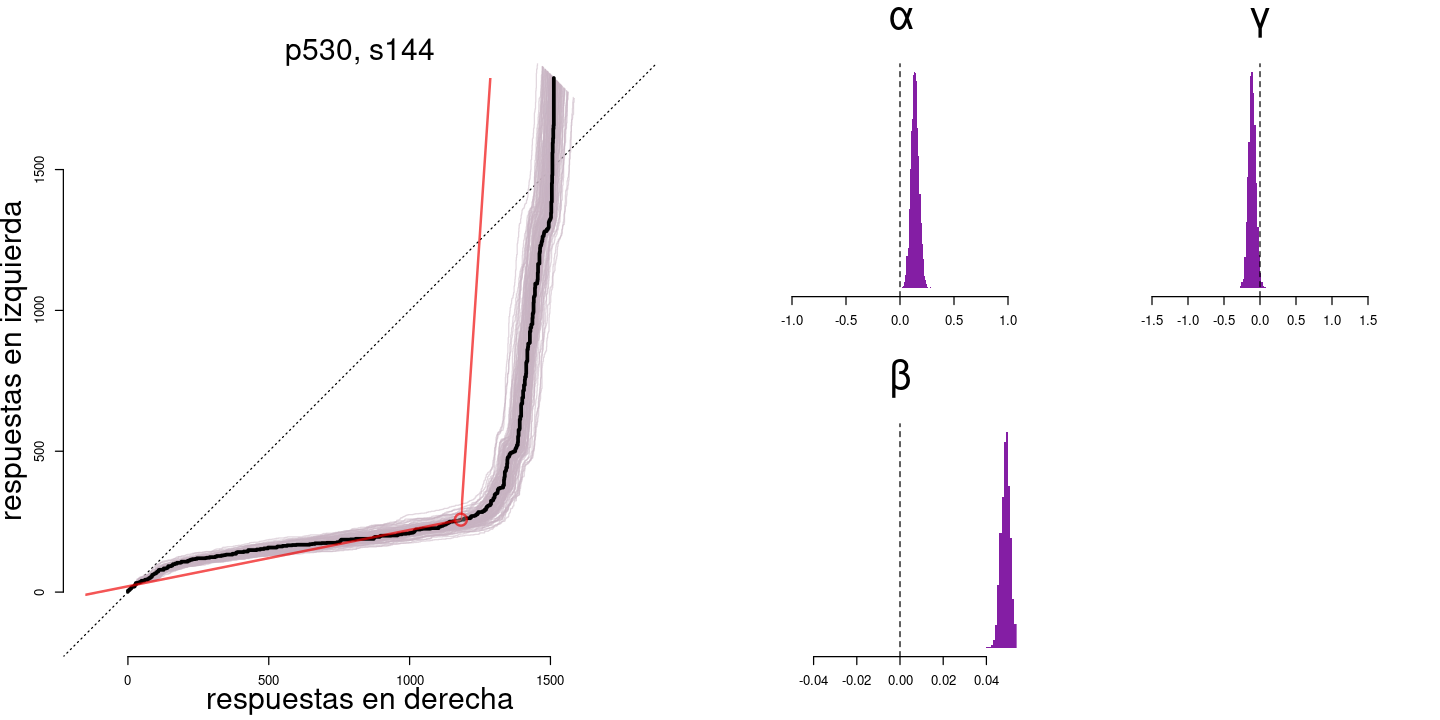

In [118]:
options(repr.plot.width=12,repr.plot.height=6)
plot_model('p530','s144',m_list = m3_p530_s144,a_lims = c(-1,1),g_lims=c(-1.5,1.5),plot_data=T)

<h2>Conclusiones (hasta ahora)</h2>

* En general, las palomas muestran subigualación en la conducta agregada.
* Sin embargo, los registros acumulados vuelven evidente que se ajustan a los nuevos ambientes cuando estos cambian sin aviso.
* Parece que el ajuste es más rápido en las últimas sesiones, cuando los cambios son frecuentes.


* El modelo logístico parece explicar las observaciones, aunque únicamente cuando utiliza una "ventana" reducida.
* Todavía es necesario evaluar al modelo en pruebas más estrictas: p.ej., aprendiendo sobre las características individuales en una sesión e intentando recuperar _otra_ sesión utilizando dicho conocimiento "lantente".
* También son llamativas otras modificaciones al modelo:
    * idealmente debería _inferir_ el tamaño de la ventana de cada paloma
    * podría dar cuenta de efectos asimétricos tanto en refozadores como en respuestas de cada opción (modelo más general en Lau & Glimcher, 2005).